In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
pip install spacy


  Obtaining dependency information for spacy from https://files.pythonhosted.org/packages/90/f0/0133b684e18932c7bf4075d94819746cee2c0329f2569db526b0fa1df1df/spacy-3.7.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for spacy-loggers<2.0.0,>=1.0.0 from https://files.pythonhosted.org/packages/33/78/d1a1a026ef3af911159398c939b1509d5c36fe524c7b644f34a5146c4e16/spacy_loggers-1.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for murmurhash<1.1.0,>=0.28.0 from https://files.pythonhosted.org/packages/71/46/af01a20ec368bd9cb49a1d2df15e3eca113bbf6952cc1f2a47f1c6801a7f/murmurhash-1.0.10-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cymem<2.1.0,>=2.0.2 from https://files.pythonhosted.org/packages/c1/c3/dd044e6f62a3d317c461f6f0c153c6573ed13025752d779e514000c15dd2/cymem-2.0.8-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for preshed<3.1.0,>=3.0.2 from https://files.pythonhosted.org/packages/e4/fc/78cdbdb79f

In [51]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.1/12.8 MB 2.0 MB/s eta 0:00:07
     ---------------------------------------- 0.2/12.8 MB 1.8 MB/s eta 0:00:07
      --------------------------------------- 0.2/12.8 MB 1.6 MB/s eta 0:00:09
     - -------------------------------------- 0.3/12.8 MB 1.9 MB/s eta 0:00:07
     - -------------------------------------- 0.4/12.8 MB 2.1 MB/s eta 0:00:06
     - -------------------------------------- 0.5/12.8 MB 1.9 MB/s eta 0:00:07
     -- ------------------------------------- 0.7/12.8 MB 2.1 MB/s eta 0:00:06
     -- ------------------------------------- 0.8/12.8 MB 2.1 MB/s eta 0:00:06
     --- ------------------------------------ 1.0/12.8 MB 2.2 MB/s eta 0:00:06
     --- ------------------------------------ 1.1/12.8 MB 2.2 MB/s eta 0:00:06
     --- ------------------------------------ 1.2/12.8 MB 2.3 MB/s eta 0:00:06
     ---- ----------------------------------- 1.3/12.8 MB 2

# Importing the dataset

In [2]:
data = pd.read_csv(r'C:\Users\Aditi\Downloads\spotify_listenership_sample.csv')
data.head()

,track_id,track_name,track_artist,track_album_release_date,track_duration_ms,sound_danceability,sound_energy,sound_key,sound_loudness,sound_mode,...,sound_liveness,sound_valence,sound_tempo,genre_edm,genre_latin,genre_pop,genre_rnb,genre_rap,genre_rock,has_listenership
0,1iTZnsVqhCBdZqp9gjITDB,Run To You,Code 64,2006-06-16,267747,0.445,0.999,0,-5.627,1,...,0.0534,0.195,139.996,0,0,1,0,0,0,0
1,42LiXQn3xibOEodtBMoJp3,Drop The Bomb On 'Em,Eminem,2009-05-15,287267,0.892,0.693,11,-4.048,0,...,0.1230,0.357,91.989,0,0,0,0,1,0,0
2,2cTGafydY9vdnqJQ2Gw6t8,Butterflies,Myon,2018-06-22,234375,0.539,0.912,7,-3.113,1,...,0.2520,0.233,128.016,1,0,0,0,0,0,0
3,2boJnT3S2aSBagFEUTXrfx,Get Your Roll On,Big Tymers,2007-01-01,245200,0.849,0.812,7,-5.005,1,...,0.1090,0.454,88.930,0,0,0,0,1,0,0
4,5HzekjQF7xLqBVeynqprDk,By Your Side,Ballin Entertainment,2008-04-20,198165,0.802,0.823,3,-9.799,0,...,0.2640,0.964,130.771,0,1,0,0,0,0,0


# Exploratory Analysis

In [3]:
data.shape

(2999, 23)

In [4]:
print(data.columns)

Index(['track_id', 'track_name', 'track_artist', 'track_album_release_date',
       'track_duration_ms', 'sound_danceability', 'sound_energy', 'sound_key',
       'sound_loudness', 'sound_mode', 'sound_speechiness',
       'sound_acousticness', 'sound_instrumentalness', 'sound_liveness',
       'sound_valence', 'sound_tempo', 'genre_edm', 'genre_latin', 'genre_pop',
       'genre_rnb', 'genre_rap', 'genre_rock', 'has_listenership'],
      dtype='object')


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  2999 non-null   object 
 1   track_name                2999 non-null   object 
 2   track_artist              2999 non-null   object 
 3   track_album_release_date  2999 non-null   object 
 4   track_duration_ms         2999 non-null   int64  
 5   sound_danceability        2999 non-null   float64
 6   sound_energy              2999 non-null   float64
 7   sound_key                 2999 non-null   int64  
 8   sound_loudness            2999 non-null   float64
 9   sound_mode                2999 non-null   int64  
 10  sound_speechiness         2999 non-null   float64
 11  sound_acousticness        2999 non-null   float64
 12  sound_instrumentalness    2999 non-null   float64
 13  sound_liveness            2999 non-null   float64
 14  sound_va

In [6]:
round((data.isnull().sum() * 100/ len(data)),2).sort_values(ascending=False)

track_id                    0.0
sound_instrumentalness      0.0
genre_rock                  0.0
genre_rap                   0.0
genre_rnb                   0.0
genre_pop                   0.0
genre_latin                 0.0
genre_edm                   0.0
sound_tempo                 0.0
sound_valence               0.0
sound_liveness              0.0
sound_acousticness          0.0
track_name                  0.0
sound_speechiness           0.0
sound_mode                  0.0
sound_loudness              0.0
sound_key                   0.0
sound_energy                0.0
sound_danceability          0.0
track_duration_ms           0.0
track_album_release_date    0.0
track_artist                0.0
has_listenership            0.0
dtype: float64

In [7]:
round((data.isna().sum() * 100/ len(data)),2).sort_values(ascending=False)

track_id                    0.0
sound_instrumentalness      0.0
genre_rock                  0.0
genre_rap                   0.0
genre_rnb                   0.0
genre_pop                   0.0
genre_latin                 0.0
genre_edm                   0.0
sound_tempo                 0.0
sound_valence               0.0
sound_liveness              0.0
sound_acousticness          0.0
track_name                  0.0
sound_speechiness           0.0
sound_mode                  0.0
sound_loudness              0.0
sound_key                   0.0
sound_energy                0.0
sound_danceability          0.0
track_duration_ms           0.0
track_album_release_date    0.0
track_artist                0.0
has_listenership            0.0
dtype: float64

In [8]:
data.describe()

,track_duration_ms,sound_danceability,sound_energy,sound_key,sound_loudness,sound_mode,sound_speechiness,sound_acousticness,sound_instrumentalness,sound_liveness,sound_valence,sound_tempo,genre_edm,genre_latin,genre_pop,genre_rnb,genre_rap,genre_rock,has_listenership
count,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000
mean,234250.801267,0.650013,0.713308,5.321107,-6.777923,0.579860,0.108767,0.161708,0.093121,0.191789,0.511576,121.087851,0.198733,0.156385,0.141714,0.167056,0.167723,0.168389,0.500167
std,65059.024433,0.147676,0.182276,3.617455,3.054931,0.493663,0.104547,0.215047,0.230834,0.158469,0.238829,26.196648,0.399113,0.363281,0.348815,0.373088,0.373682,0.374274,0.500083
min,29493.000000,0.116000,0.065800,0.000000,-36.624000,0.000000,0.023400,0.000005,0.000000,0.016300,0.023400,46.169000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,191957.000000,0.550000,0.599000,2.000000,-8.243000,0.000000,0.041200,0.011600,0.000000,0.090550,0.329500,99.991500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,223027.000000,0.668000,0.743000,6.000000,-6.206000,1.000000,0.062900,0.063300,0.000040,0.126000,0.517000,122.997000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,264011.500000,0.760000,0.857000,8.000000,-4.672500,1.000000,0.132500,0.224000,0.010700,0.254000,0.705000,132.390500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,511400.000000,0.965000,0.999000,11.000000,0.642000,1.000000,0.860000,0.989000,0.972000,0.992000,0.977000,204.527000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


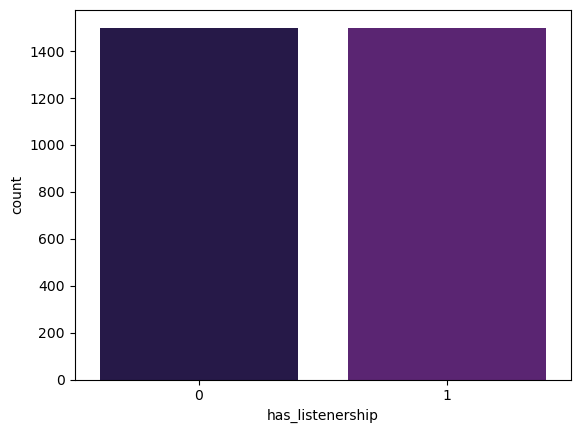

In [9]:
custom_palette = sns.color_palette("magma")

# Create the countplot with the specified color palette
sns.countplot(x='has_listenership', data=data, palette=custom_palette)

# Show the plot
plt.show()

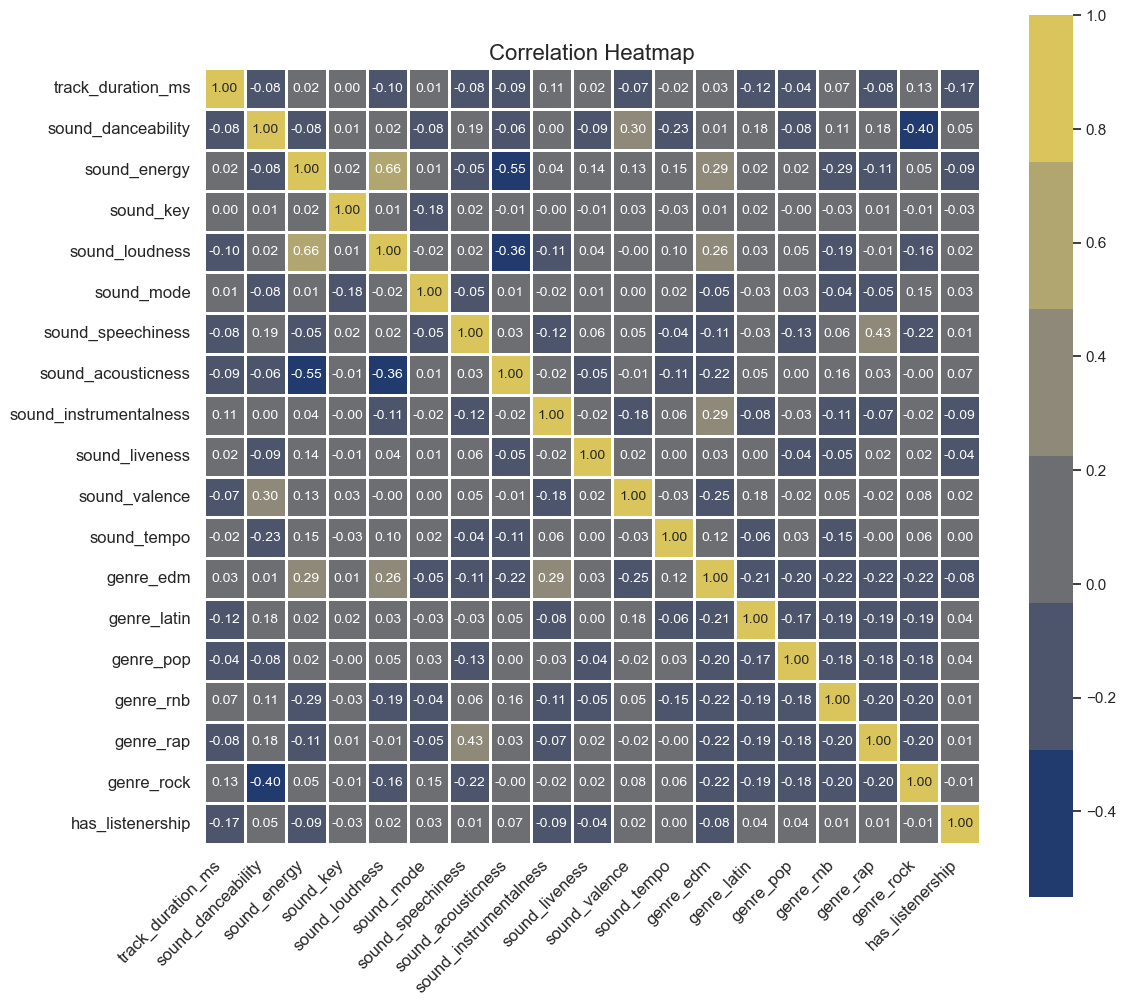

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'data' with numerical features
numerical_features = data.select_dtypes(include=['number']).columns

# Generate the correlation matrix for numerical features
corr_matrix = data[numerical_features].corr()

# Set the style and color palette
sns.set(style='whitegrid')
palette = sns.color_palette("cividis")

# Create a larger figure for the heatmap
plt.figure(figsize=(12, 12))

# Plot the heatmap
heatmap = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=palette,
                      square=True, linewidths=.8, annot_kws={"size": 10}, cbar_kws={'shrink': 0.8})

# Customize labels and title
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

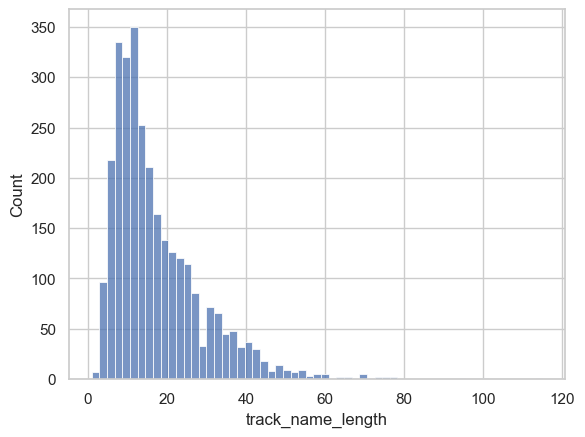

In [11]:
data['track_name_length'] = data['track_name'].apply(len)
sns.histplot(data['track_name_length'])
plt.show()

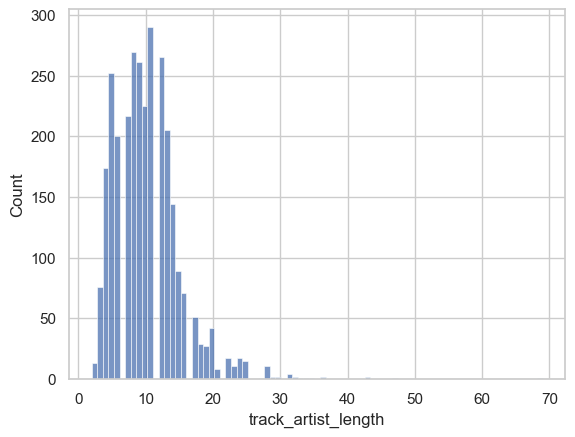

In [12]:
data['track_artist_length'] = data['track_artist'].apply(len)
sns.histplot(data['track_artist_length'])
plt.show()

# Feature Extraction

In [13]:
data.drop_duplicates(inplace=True)

In [14]:
data.shape

(2960, 25)

In [15]:
loudness_threshold = 3  # Adjust threshold as needed
data = data[data['sound_loudness'].between(data['sound_loudness'].quantile(0.05), data['sound_loudness'].quantile(0.95))]

In [16]:
data.shape

(2664, 25)

In [17]:
data['track_album_release_date'] = pd.to_datetime(data['track_album_release_date'])

# Extract year, month, and day
data['year'] = data['track_album_release_date'].dt.year
data['month'] = data['track_album_release_date'].dt.month
data['day'] = data['track_album_release_date'].dt.day

# Display the modified DataFrame
data.head()


,track_id,track_name,track_artist,track_album_release_date,track_duration_ms,sound_danceability,sound_energy,sound_key,sound_loudness,sound_mode,...,genre_pop,genre_rnb,genre_rap,genre_rock,has_listenership,track_name_length,track_artist_length,year,month,day
0,1iTZnsVqhCBdZqp9gjITDB,Run To You,Code 64,2006-06-16,267747,0.445,0.999,0,-5.627,1,...,1,0,0,0,0,10,7,2006,6,16
1,42LiXQn3xibOEodtBMoJp3,Drop The Bomb On 'Em,Eminem,2009-05-15,287267,0.892,0.693,11,-4.048,0,...,0,0,1,0,0,20,6,2009,5,15
2,2cTGafydY9vdnqJQ2Gw6t8,Butterflies,Myon,2018-06-22,234375,0.539,0.912,7,-3.113,1,...,0,0,0,0,0,11,4,2018,6,22
3,2boJnT3S2aSBagFEUTXrfx,Get Your Roll On,Big Tymers,2007-01-01,245200,0.849,0.812,7,-5.005,1,...,0,0,1,0,0,16,10,2007,1,1
4,5HzekjQF7xLqBVeynqprDk,By Your Side,Ballin Entertainment,2008-04-20,198165,0.802,0.823,3,-9.799,0,...,0,0,0,0,0,12,20,2008,4,20


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Select numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64'])

# Separate features (X) and target variable (y)
X = numerical_features.drop('has_listenership', axis=1)  # Drop the target column
y = data['has_listenership']

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [19]:
def plot_confusion_matrix(conf_matrix, class_names, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# I. FITTING DIFFERENT MODEL TYPES

# 1. Random Forest Classifier

Random Forest Accuracy: 0.6585365853658537
Mean Squared Error: 0.34146341463414637
Root Mean Squared Error: 0.5843487097907776
R-squared Score: -0.36585846639069564
              precision    recall  f1-score   support

           0       0.63      0.76      0.69       267
           1       0.70      0.56      0.62       266

    accuracy                           0.66       533
   macro avg       0.66      0.66      0.66       533
weighted avg       0.66      0.66      0.66       533



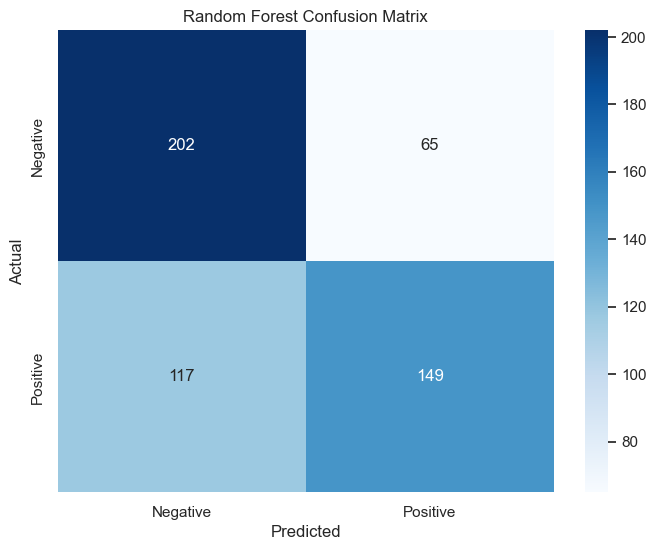

In [20]:
import numpy as np
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
rf_predictions = rf_classifier.predict(X_test)

# Evaluate accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)
from sklearn.metrics import mean_squared_error, r2_score


# Calculate evaluation metrics
mse = mean_squared_error(y_test, rf_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, rf_predictions)

# Print the metrics
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared Score: {r2}')

print(classification_report(y_test, rf_predictions))

rf_conf_matrix = confusion_matrix(y_test, rf_predictions)

plot_confusion_matrix(rf_conf_matrix, ['Negative', 'Positive'], 'Random Forest')


# 2.Naive Bayes

Gaussian Naive Bayes Accuracy: 0.5928705440900562
Mean Squared Error: 0.4071294559099437
Root Mean Squared Error: 0.6380669682015703
R-squared Score: -0.6285235560812141
              precision    recall  f1-score   support

           0       0.61      0.54      0.57       267
           1       0.58      0.65      0.61       266

    accuracy                           0.59       533
   macro avg       0.59      0.59      0.59       533
weighted avg       0.59      0.59      0.59       533



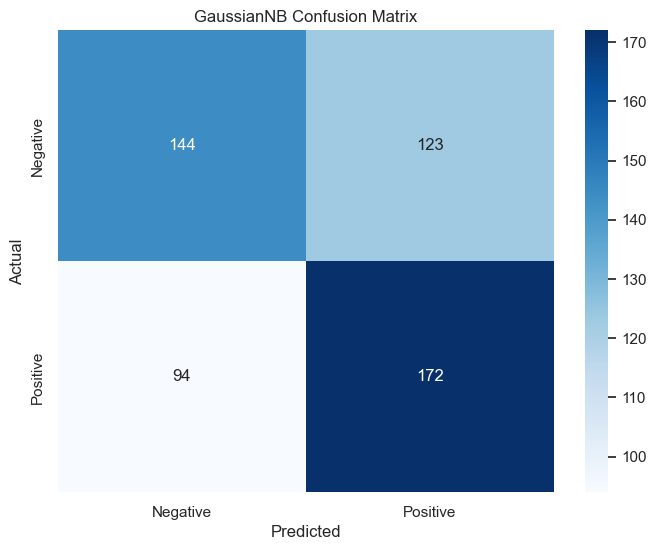

In [21]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes Classifier
gnb_classifier = GaussianNB()

# Train the classifier
gnb_classifier.fit(X_train, y_train)

# Predict on the test set
gnb_predictions = gnb_classifier.predict(X_test)

# Evaluate accuracy
gnb_accuracy = accuracy_score(y_test, gnb_predictions)
print("Gaussian Naive Bayes Accuracy:", gnb_accuracy)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, gnb_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, gnb_predictions)

# Print the metrics
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared Score: {r2}')

print(classification_report(y_test, gnb_predictions))

# Print the confusion matrix
nb_conf_matrix = confusion_matrix(y_test, gnb_predictions)
plot_confusion_matrix(nb_conf_matrix, ['Negative', 'Positive'], 'GaussianNB')



# 3. XGBOOST

XGBoost Accuracy: 0.6285178236397748
Mean Squared Error: 0.3714821763602251
Root Mean Squared Error: 0.6094933767976688
R-squared Score: -0.485933935963504
              precision    recall  f1-score   support

           0       0.62      0.69      0.65       267
           1       0.64      0.57      0.61       266

    accuracy                           0.63       533
   macro avg       0.63      0.63      0.63       533
weighted avg       0.63      0.63      0.63       533



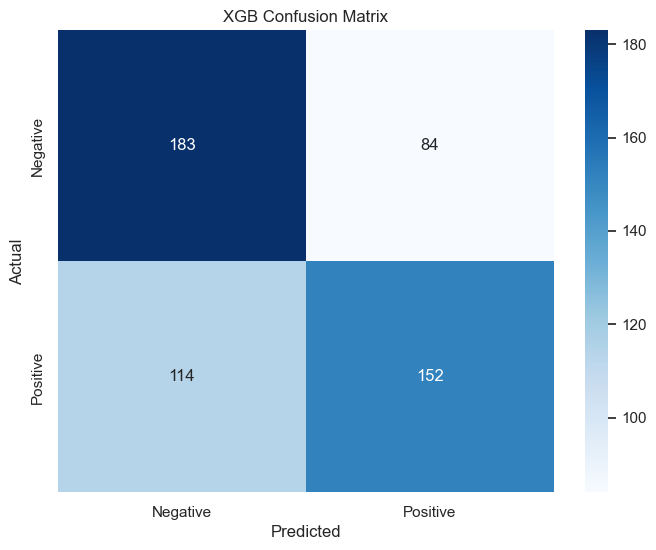

In [22]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Create an XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=42)

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Predict on the test set
xgb_predictions = xgb_classifier.predict(X_test)

# Evaluate accuracy
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("XGBoost Accuracy:", xgb_accuracy)
# Calculate evaluation metrics
mse = mean_squared_error(y_test, xgb_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, xgb_predictions)

# Print the metrics
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared Score: {r2}')
print(classification_report(y_test, xgb_predictions))

# Print the confusion matrix
xgb_conf_matrix = confusion_matrix(y_test, xgb_predictions)
plot_confusion_matrix(xgb_conf_matrix, ['Negative', 'Positive'], 'XGB')

# KNN Classifier

KNN Accuracy: 0.574108818011257
Mean Squared Error: 0.425891181988743
Root Mean Squared Error: 0.6526033879690964
R-squared Score: -0.7035707245642193
              precision    recall  f1-score   support

           0       0.58      0.57      0.57       267
           1       0.57      0.58      0.58       266

    accuracy                           0.57       533
   macro avg       0.57      0.57      0.57       533
weighted avg       0.57      0.57      0.57       533



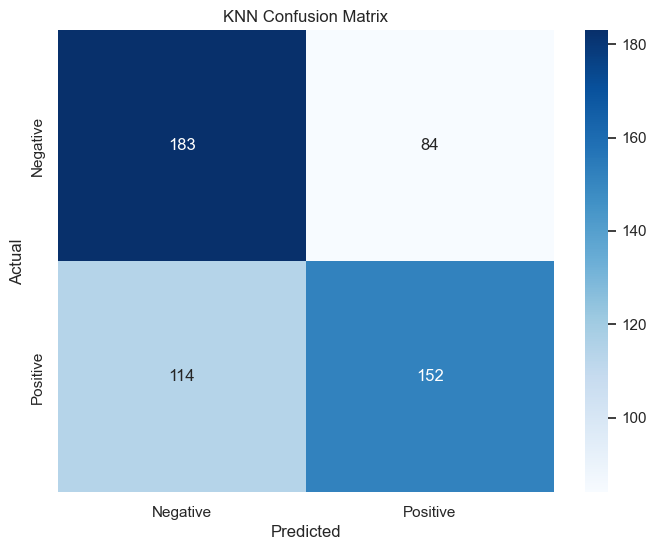

In [23]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Predict on the test set
knn_predictions = knn_classifier.predict(X_test)

# Evaluate accuracy
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("KNN Accuracy:", knn_accuracy)
# Calculate evaluation metrics
mse = mean_squared_error(y_test, knn_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, knn_predictions)

# Print the metrics
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared Score: {r2}')
print(classification_report(y_test, knn_predictions))

# Print the confusion matrix
knn_conf_matrix = confusion_matrix(y_test, xgb_predictions)
plot_confusion_matrix(knn_conf_matrix, ['Negative', 'Positive'], 'KNN')

# II.Model Evaludation Report

# Random Forest:

Accuracy: 0.6585    

Mean Squared Error: 0.3415  

Root Mean Squared Error: 0.5843  

R-squared Score: -0.3659
    
# Naive Bayes:

Accuracy: 0.5929  

Mean Squared Error: 0.4071  

Root Mean Squared Error: 0.6381  

R-squared Score: -0.6285
    
# XGBoost:

Accuracy: 0.6285  

Mean Squared Error: 0.3715  

Root Mean Squared Error: 0.6095  

R-squared Score: -0.4860
    
# KNN Classifier:

Accuracy: 0.5741  

Mean Squared Error: 0.4259  

Root Mean Squared Error: 0.6526  

R-squared Score: -0.7036

# III.Creating textual features from the song title `track_name` using TF-IDF

In [24]:
custom_stop_words = [
    'and', 'the', 'is', 'of', 'on', 'in', 'with', 
    'it', 'to', 'spotify', 'english', 'time', 'new', 'like', 'year',
    'years', 'good', 'best', 'great', 'popular', 'hit', 'hits', 'single'
]

vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words=custom_stop_words)

# Apply the vectorizer to the 'track_name' column in the 'data' DataFrame
X_text = vectorizer.fit_transform(data['track_name'])

feature_names = vectorizer.get_feature_names_out()
TF_df = pd.DataFrame(X_text.toarray(), columns=feature_names)

# Displaying the first few rows of the resulting bag of words DataFrame
TF_df.head()

,000,000 hours,10,10 000,10 freaky,10 remix,100,100 pure,100 shooters,1000,...,ボイスメモ,ボイスメモ no,男と女,기집애,나쁜,나쁜 기집애,불타오르네,불타오르네 fire,비가내려,비가내려 feat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# Summing all rows for each column to find the total frequency of each term
term_frequencies = TF_df.sum().sort_values(ascending=False)

# Extracting the top terms
top_terms = term_frequencies.head(20)  # Top 20 terms for demonstration
top_terms

feat            184
you             175
remix           171
me              147
mix              88
love             82
edit             77
radio            69
original         57
my               56
radio edit       54
original mix     47
version          47
no               47
up               43
get              40
remastered       34
go               33
let              32
remaster         32
dtype: int64

In [26]:
from sklearn.feature_extraction.text import TfidfTransformer

# Initializing the TfidfTransformer
tfidf_transformer = TfidfTransformer()

# Applying the transformer to the bag-of-words model
tfidf_matrix = tfidf_transformer.fit_transform(X_text)

# Creating a DataFrame for the TF-IDF values
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Displaying the first few rows of the TF-IDF DataFrame
tfidf_df.head()

,000,000 hours,10,10 000,10 freaky,10 remix,100,100 pure,100 shooters,1000,...,ボイスメモ,ボイスメモ no,男と女,기집애,나쁜,나쁜 기집애,불타오르네,불타오르네 fire,비가내려,비가내려 feat
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# Summing the TF-IDF values for each term across all documents
term_tfidf_sums = tfidf_df.sum().sort_values(ascending=False)

term_tfidf_sums.head(20)

you             42.222334
me              35.494732
remix           33.108553
feat            30.170023
love            25.058617
mix             21.967624
edit            18.437956
radio           17.430073
original        16.952625
my              15.346197
original mix    15.073971
radio edit      14.555998
no              14.412369
up              14.406234
get             12.583613
version         11.405178
back            11.176513
so              10.511911
go              10.290117
down             9.896627
dtype: float64

In [28]:
# Selecting the top 10000 terms
top_1000_terms = term_tfidf_sums.head(10000).index

# Creating a new DataFrame with only the top 10000 terms
tfidf_top_1000_df = tfidf_df[top_1000_terms]

# Displaying the first few rows of the new DataFrame with top 10000 terms
tfidf_top_1000_df.head()

,you,me,remix,feat,love,mix,edit,radio,original,my,...,calls,but bet,won answer,only way,bet you,phone,phone calls,you ll,answer my,song so
0,0.340953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# Make sure the indices of all DataFrames align
tfidf_df = tfidf_top_1000_df.reset_index(drop=True)
data = data[['track_id','track_artist',
       'track_duration_ms', 'sound_danceability', 'sound_energy', 'sound_key',
       'sound_loudness', 'sound_mode', 'sound_speechiness',
       'sound_acousticness', 'sound_instrumentalness', 'sound_liveness',
       'sound_valence', 'sound_tempo', 'genre_edm', 'genre_latin', 'genre_pop',
       'genre_rnb', 'genre_rap', 'genre_rock', 'has_listenership',
       'track_artist_length', 'track_name_length', 'year', 'month', 'day']].reset_index(drop=True)

# Concatenating the TF-IDF DataFrame and NER DataFrame with the original DataFrame
music_df_text_features = pd.concat([data, tfidf_df], axis=1)

In [30]:
music_df_text_features.columns

Index(['track_id', 'track_artist', 'track_duration_ms', 'sound_danceability',
       'sound_energy', 'sound_key', 'sound_loudness', 'sound_mode',
       'sound_speechiness', 'sound_acousticness',
       ...
       'calls', 'but bet', 'won answer', 'only way', 'bet you', 'phone',
       'phone calls', 'you ll', 'answer my', 'song so'],
      dtype='object', length=7113)

In [31]:
music_df_text_features = pd.get_dummies(music_df_text_features, columns=['track_artist','track_id'], prefix='category')

In [32]:
# Separating features and target variable
X_all = music_df_text_features.drop('has_listenership', axis=1)  # all columns except 'lnrevenue'
y_all = music_df_text_features['has_listenership']  # 'lnrevenue' column

# Splitting the data into training and testing sets
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

# IV. a model incorporating both numerical and textual features and comparison of performance

# 1. Accuracy:

Random Forest: 66.04%  
    
KNN Classifier: 52.35%  
    
Naive Bayes: 60.98%

# 2. Precision and Recall:

Random Forest exhibits balanced precision and recall for both classes.  

KNN Classifier has a higher precision for class 0 but lower recall for both classes.  

Naive Bayes shows balanced precision and recall, but slightly lower than Random Forest.

# 3. Root Mean Squared Error (RMSE):

Random Forest has the lowest RMSE (0.5827), indicating better predictive accuracy.  

KNN Classifier has a higher RMSE (0.6903), indicating less accurate predictions.  

Naive Bayes has an intermediate RMSE (0.6247).

# 4. R-squared Score:

Random Forest and Naive Bayes have negative R-squared scores, indicating that the models do not fit the data well.
KNN Classifier has a significantly more negative R-squared score, suggesting poor model fit.

# Conclusion:
Among the models, the Random Forest model with textual features performs the best, offering a good balance between precision, recall, and accuracy.

# V.The inclusion of textual features did not seem to have much improvement with respect to the improvement in the model performance metics.

# Random Forest Classifier

Random Forest Accuracy: 0.6604127579737336
Mean Squared Error: 0.3395872420262664
Root Mean Squared Error: 0.5827411449574043
R-squared Score: -0.3583537495423952
              precision    recall  f1-score   support

           0       0.65      0.70      0.67       267
           1       0.67      0.62      0.65       266

    accuracy                           0.66       533
   macro avg       0.66      0.66      0.66       533
weighted avg       0.66      0.66      0.66       533



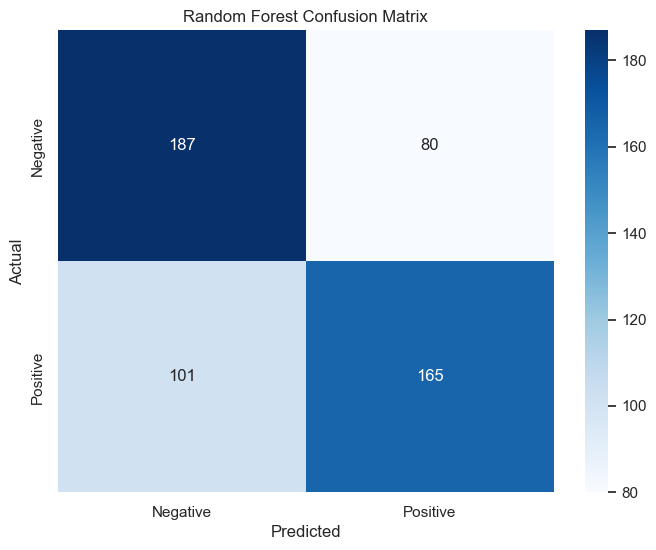

In [33]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=500, random_state=42)

# Train the classifier
rf_classifier.fit(X_train_all, y_train_all)

# Predict on the test set
rf_predictions = rf_classifier.predict(X_test_all)

# Evaluate accuracy
rf_accuracy = accuracy_score(y_test_all, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)
from sklearn.metrics import mean_squared_error, r2_score


# Calculate evaluation metrics
mse = mean_squared_error(y_test_all, rf_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_all, rf_predictions)

# Print the metrics
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared Score: {r2}')

print(classification_report(y_test_all, rf_predictions))

rf_conf_matrix = confusion_matrix(y_test_all, rf_predictions)

plot_confusion_matrix(rf_conf_matrix, ['Negative', 'Positive'], 'Random Forest')

# KNN Classifier

KNN Accuracy: 0.5234521575984991
Mean Squared Error: 0.47654784240150094
Root Mean Squared Error: 0.690324447199649
R-squared Score: -0.9061980794683335
              precision    recall  f1-score   support

           0       0.52      0.60      0.56       267
           1       0.53      0.45      0.48       266

    accuracy                           0.52       533
   macro avg       0.52      0.52      0.52       533
weighted avg       0.52      0.52      0.52       533



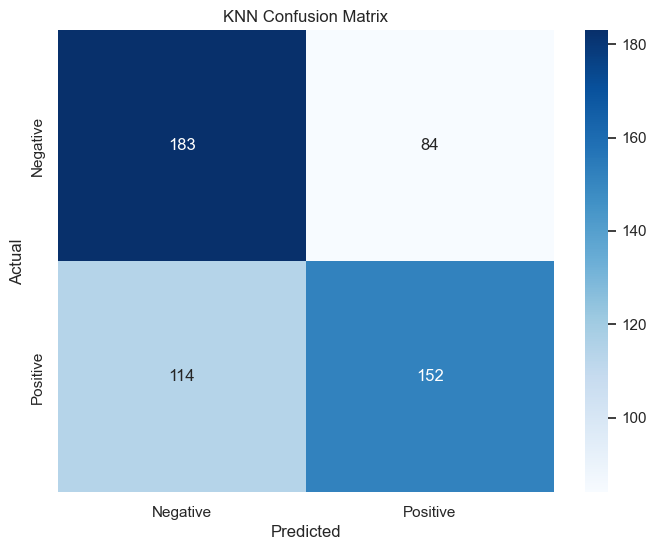

In [43]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=10)

# Train the classifier
knn_classifier.fit(X_train_all, y_train_all)

# Predict on the test set
knn_predictions = knn_classifier.predict(X_test_all)

# Evaluate accuracy
knn_accuracy = accuracy_score(y_test_all, knn_predictions)
print("KNN Accuracy:", knn_accuracy)
# Calculate evaluation metrics
mse = mean_squared_error(y_test_all, knn_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_all, knn_predictions)

# Print the metrics
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared Score: {r2}')
print(classification_report(y_test_all, knn_predictions))

# Print the confusion matrix
knn_conf_matrix = confusion_matrix(y_test_all, xgb_predictions)
plot_confusion_matrix(knn_conf_matrix, ['Negative', 'Positive'], 'KNN')

# Naive Bayes 

Gaussian Naive Bayes Accuracy: 0.6097560975609756
Mean Squared Error: 0.3902439024390244
Root Mean Squared Error: 0.6246950475544243
R-squared Score: -0.5609811044465094
              precision    recall  f1-score   support

           0       0.63      0.53      0.58       267
           1       0.59      0.69      0.64       266

    accuracy                           0.61       533
   macro avg       0.61      0.61      0.61       533
weighted avg       0.61      0.61      0.61       533



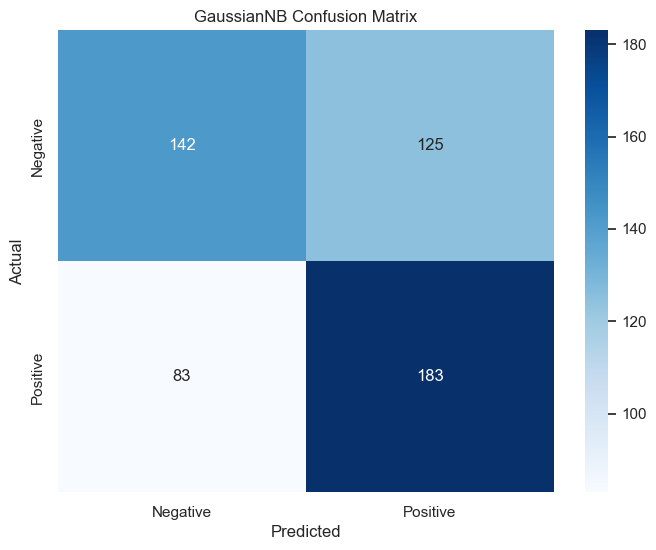

In [45]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes Classifier
gnb_classifier = GaussianNB()

# Train the classifier
gnb_classifier.fit(X_train_all, y_train_all)

# Predict on the test set
gnb_predictions = gnb_classifier.predict(X_test_all)

# Evaluate accuracy
gnb_accuracy = accuracy_score(y_test_all, gnb_predictions)
print("Gaussian Naive Bayes Accuracy:", gnb_accuracy)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_all, gnb_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_all, gnb_predictions)

# Print the metrics
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared Score: {r2}')

print(classification_report(y_test_all, gnb_predictions))

# Print the confusion matrix
nb_conf_matrix = confusion_matrix(y_test_all, gnb_predictions)
plot_confusion_matrix(nb_conf_matrix, ['Negative', 'Positive'], 'GaussianNB')

# VI.Topic Modeling using LDA

# VII. Identifying distinct topics within the song and the theme

# Topic 1: Emotional Love
Keywords: me, up, you, take, it, wanna, love, sweet, so, be  

<b>Possible Theme</b>: This topic seems to revolve around personal emotions and relationships. It may include themes of love, sweetness, and expressing emotions.
# Topic 2: Movement and Remix
Keywords: the, at, do, you, run, remix, back, around, feat, where  

<b>Possible Theme</b>: This topic could be related to movement, activities, or locations. It might involve themes of running, going back, and featuring collaborations.
# Topic 3: Creative Expression
Keywords: way, remix, the, on, light, keep, mix, my, el, original  

<b>Possible Theme</b>: This topic might be associated with creativity and expression. It could involve themes related to finding one's way, keeping the light, and originality in music.
# Topic 4: Longing and Forever
Keywords: more, forever, of, feat, the, me, home, lights, la, to  

<b>Possible Theme</b>: This topic appears to be about a sense of longing or permanence. It may involve themes of forever, home, lights, and possibly a location (La).
# Topic 5: Diverse Conditions
Keywords: the, mix, paradise, no, of, lost, in, original, remix, can  

<b>Possible Theme</b>: This topic seems to be related to various states or conditions. It might include themes of paradise, being lost, and the idea that something can be original or remixed.
# Topic 6: Emotional Journeys
Keywords: let, on, you, go, down, one, tonight, never, me, remix  

<b>Possible Theme</b>: This topic suggests movement, actions, and emotions. It might involve themes of letting go, going down, and the idea of a night that never ends.
# Topic 7: Varied Experiences
Keywords: me, to, heaven, remix, got, we, stay, the, bad, feat  

<b>Possible Theme</b>: This topic could be associated with various experiences and emotions. It may involve themes of going to heaven, staying together, and possibly overcoming challenges.
# Topic 8: Musical Elements
Keywords: edit, radio, the, mix, in, original, like, rock, me, back  

<b>Possible Theme</b>: This topic might be related to musical elements and genres. It could involve themes of radio edits, original mixes, and the idea of music being like a rock.
# Topic 9: Love and Desire
Keywords: love, good, want, you, what, it, is, dance, crazy, the  

<b>Possible Theme</b>: This topic seems to be centered around the theme of love and desire. It may involve expressions of wanting, dancing, and the idea of love being crazy.
# Topic 10: Actions and Desires
Keywords: you, remix, get, need, over, feat, that, the, version, ride  

<b>Possible Theme</b>: This topic could be associated with various actions and desires. It might involve themes of getting, needing, riding, and different versions or remixes.

In [55]:
# Create a TF-IDF matrix for topic modeling
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(data['track_name'])

# Train LDA model
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
lda_topics = lda_model.fit_transform(X_tfidf)

# Display the top words for each topic
for i, topic in enumerate(lda_model.components_):
    top_words = [tfidf_vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-10:]][::-1]
    print(f'Topic {i+1}: {", ".join(top_words)}')


Topic 1: me, up, you, take, it, wanna, love, sweet, so, be
Topic 2: the, at, do, you, run, remix, back, around, feat, where
Topic 3: way, remix, the, on, light, keep, mix, my, el, original
Topic 4: more, forever, of, feat, the, me, home, lights, la, to
Topic 5: the, mix, paradise, no, of, lost, in, original, remix, can
Topic 6: let, on, you, go, down, one, tonight, never, me, remix
Topic 7: me, to, heaven, remix, got, we, stay, the, bad, feat
Topic 8: edit, radio, the, mix, in, original, like, rock, me, back
Topic 9: love, good, want, you, what, it, is, dance, crazy, the
Topic 10: you, remix, get, need, over, feat, that, the, version, ride
